In [18]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
import scanpy.external as scex
import sklearn.metrics
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

import sys

In [2]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

Set up out properties

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-pac

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.10


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [4]:
%matplotlib inline

Set scanpy out-files

In [5]:
writeDir = "write/"

#fileName = "pdacMouseMrtx"
fileName = "pdacPdxMrtx"

resultsFile = writeDir + fileName + '.h5ad'       # final output
resultsFileTotal = writeDir + fileName + 'wImm.h5ad'       # final output
resultsFileQC = writeDir + fileName + '_QC.h5ad'  # post QC (pre-analysis) 

Set figure parameters

In [6]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

In [7]:
sigGenes = pd.read_csv("data/basClaSigGenes.csv")
sigGenes = sigGenes[["scBasal","scClassical","EMT"]]
sigGenes

scBasal scClassical     EMT
0       KRT6A      LGALS4  FERMT2
1      S100A2        CTSE  GLIPR1
2       KRT13        TFF1  COL8A2
3       KRT17        AGR2    MMP1
4        LY6D      TSPAN8  SLC6A8
..        ...         ...     ...
195      CNN2       ABCC3     NaN
196   SLC16A3      RABAC1     NaN
197      YBX1        ASS1     NaN
198  MTRNR2L8     CHCHD10     NaN
199    KIRREL       PRR15     NaN

[200 rows x 3 columns]

In [8]:
adata = sc.read(resultsFile)

In [9]:
adata

AnnData object with n_obs × n_vars = 5097 × 2098
    obs: 'MRTX1_B0251', 'MRTX2_B0252', 'MRTX3_B0253', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'GMM', 'Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256', 'treatment', 'S_score', 'G2M_score', 'phase', 'leiden', 'tumor', 'scBasalScore', 'scClassicalScore', 'EMTScore', 'cellState', 'decoupler', 'zsig'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mt'
    uns: 'GMM_colors', 'cellState_colors', 'decoupler_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase

In [10]:
adata.var

highly_variable     means  dispersions  dispersions_norm  \
A2ML1-AS1              True  0.211488     1.119923          2.107098   
ABCA1                  True  0.087627     0.879074          1.579997   
ABCA10                 True  0.085834     0.666485          1.106636   
ABCA12                 True  0.270705     1.131354          2.137446   
ABCA5                  True  0.552809     0.798679          0.836376   
...                     ...       ...          ...               ...   
ZRANB2-AS2             True  0.109702     0.591518          0.931040   
ZSWIM4                 True  0.173735     0.867724          1.558256   
ZSWIM5                 True  0.068075     0.591186          0.922929   
ZSWIM6                 True  1.761379     1.808210          0.987309   
ZSWIM8                 True  0.189642     0.519075          0.759228   

            highly_variable_nbatches  highly_variable_intersection     mt  
A2ML1-AS1                          2                          True  False  
ABCA1                              2                          True  False  
ABCA10                             2                          True  False  
ABCA12                             2                          True  False  
ABCA5                              2                          True  False  
...                              ...                           ...    ...  
ZRANB2-AS2                         2                          True  False  
ZSWIM4                             2                          True  False  
ZSWIM5                             2                          True  False  
ZSWIM6                             2                          True  False  
ZSWIM8                             2                          True  False  

[2098 rows x 7 columns]

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


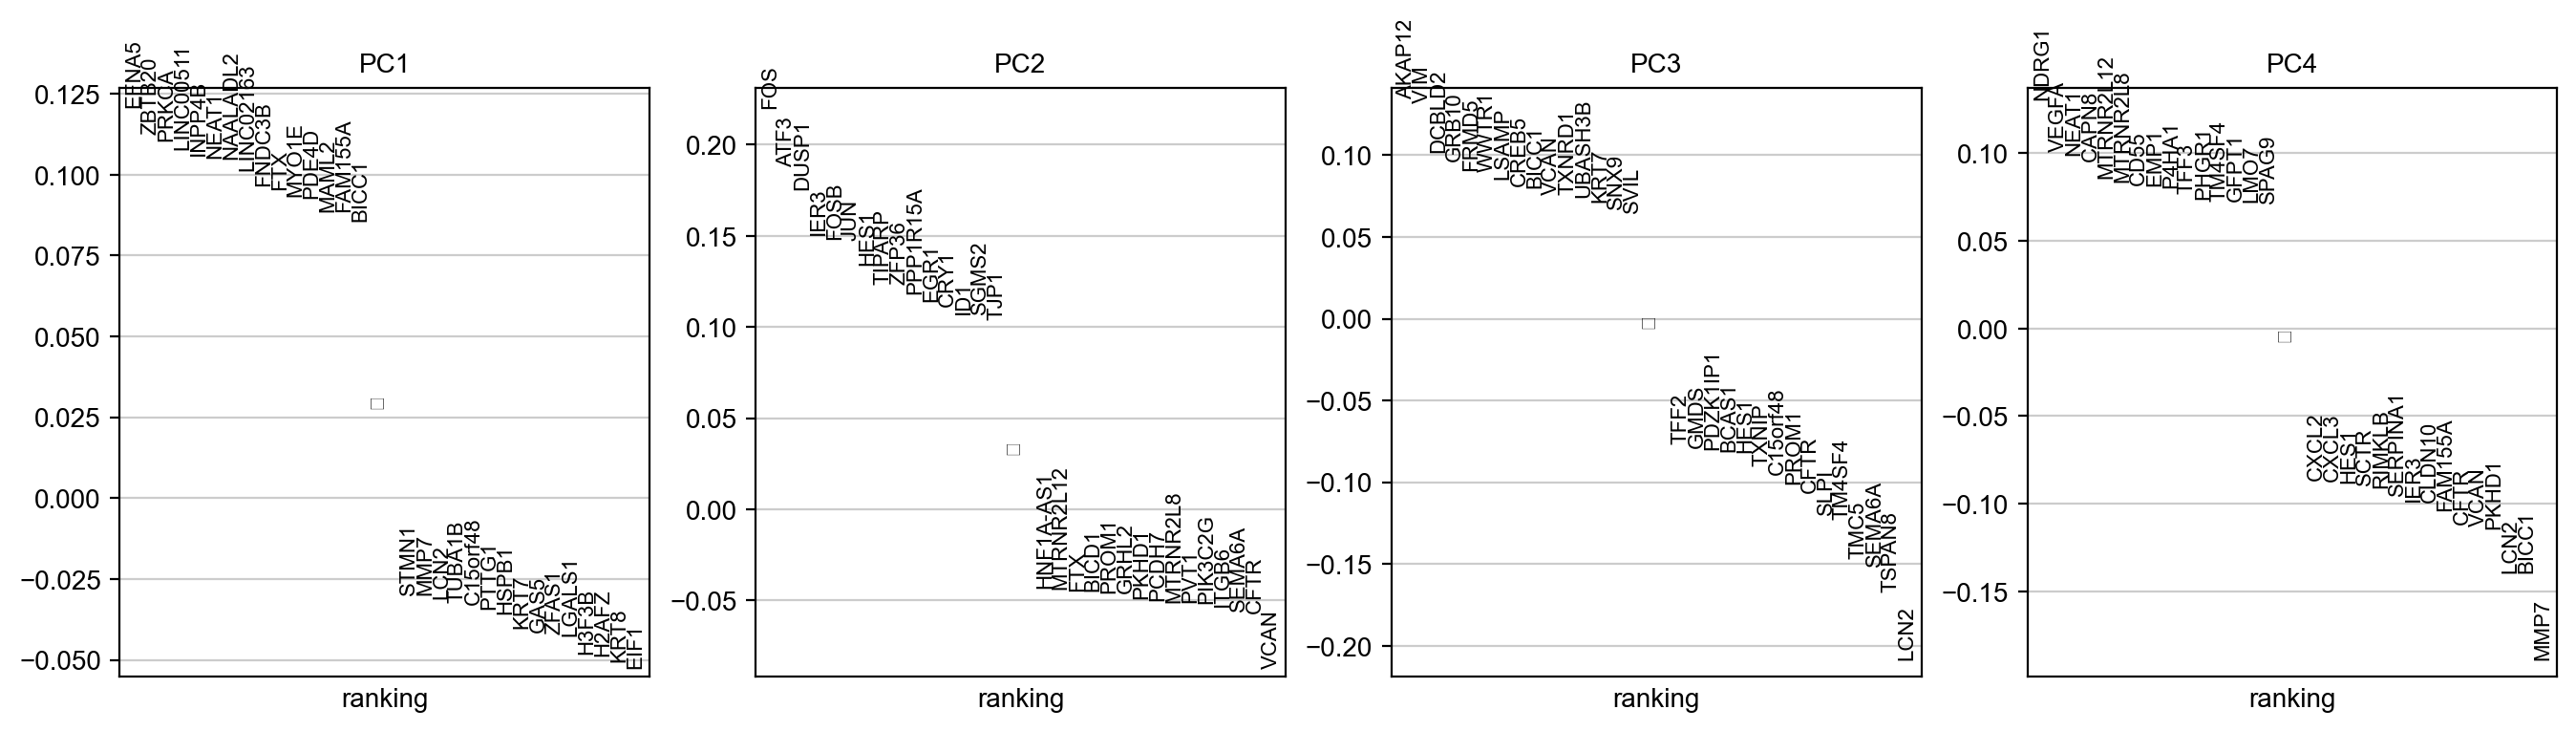

In [11]:
sc.pl.pca_loadings(adata, components=[1,2,3,4])

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


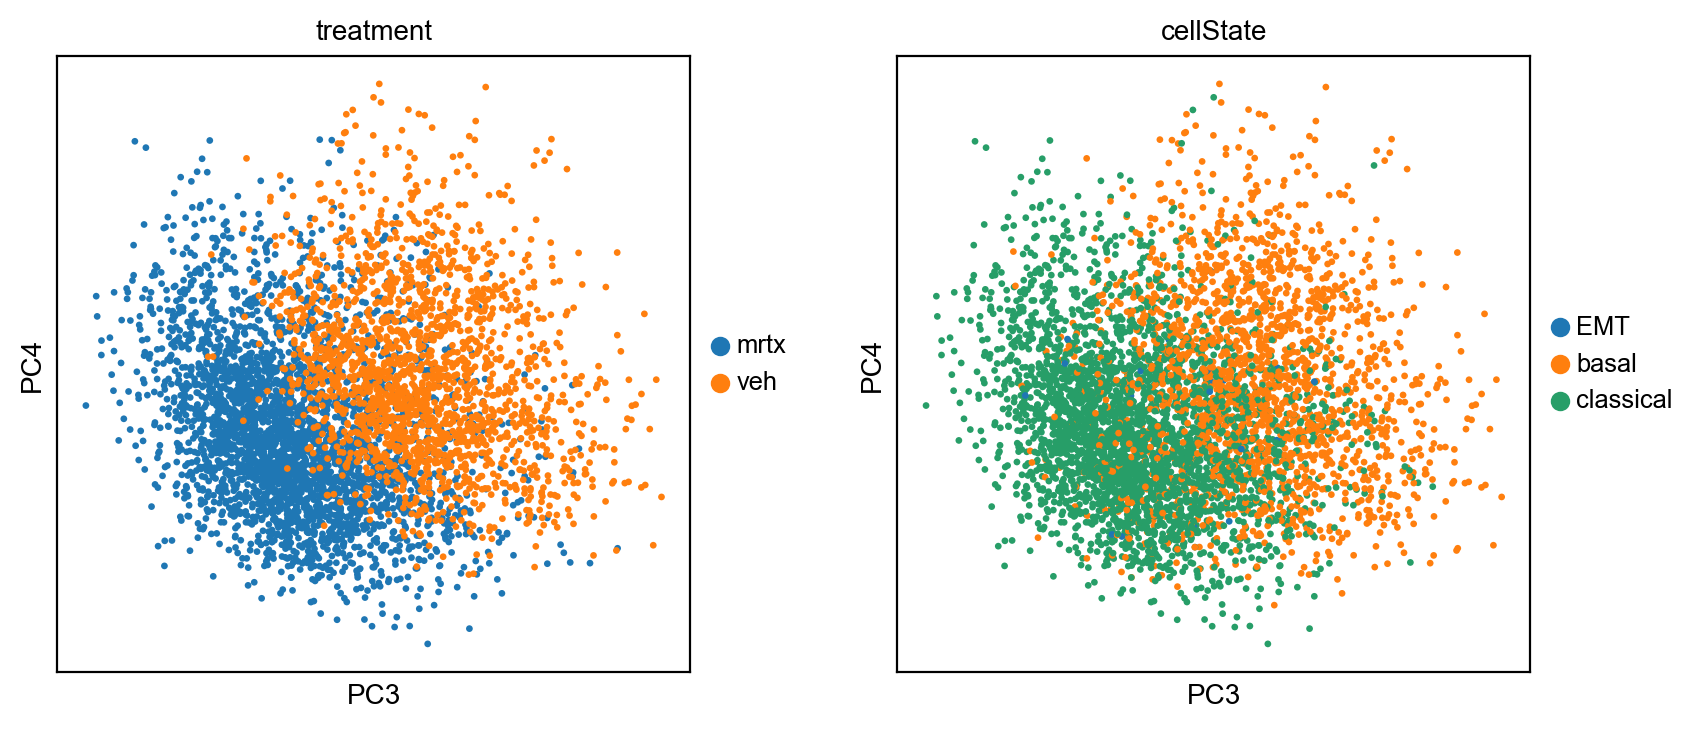

In [12]:
sc.pl.pca(adata,color=['treatment', 'cellState'],dimensions =  [(2,3)])

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


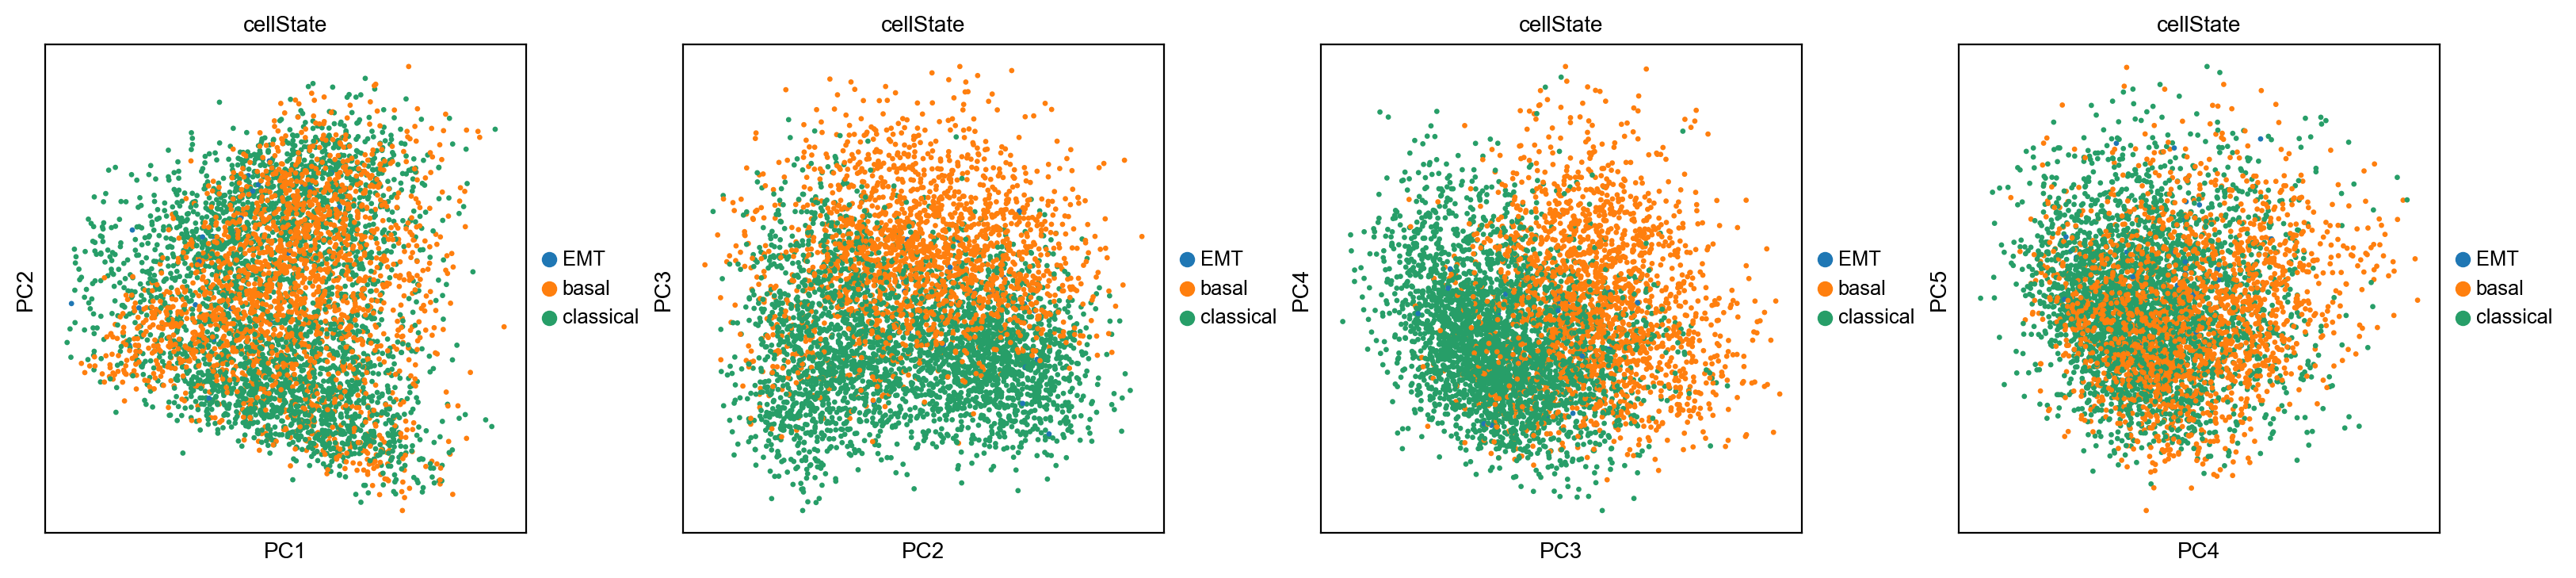

In [223]:
sc.pl.pca(adata,color=['cellState'],dimensions =  [(0, 1), (1, 2), (2,3), (3,4)])

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


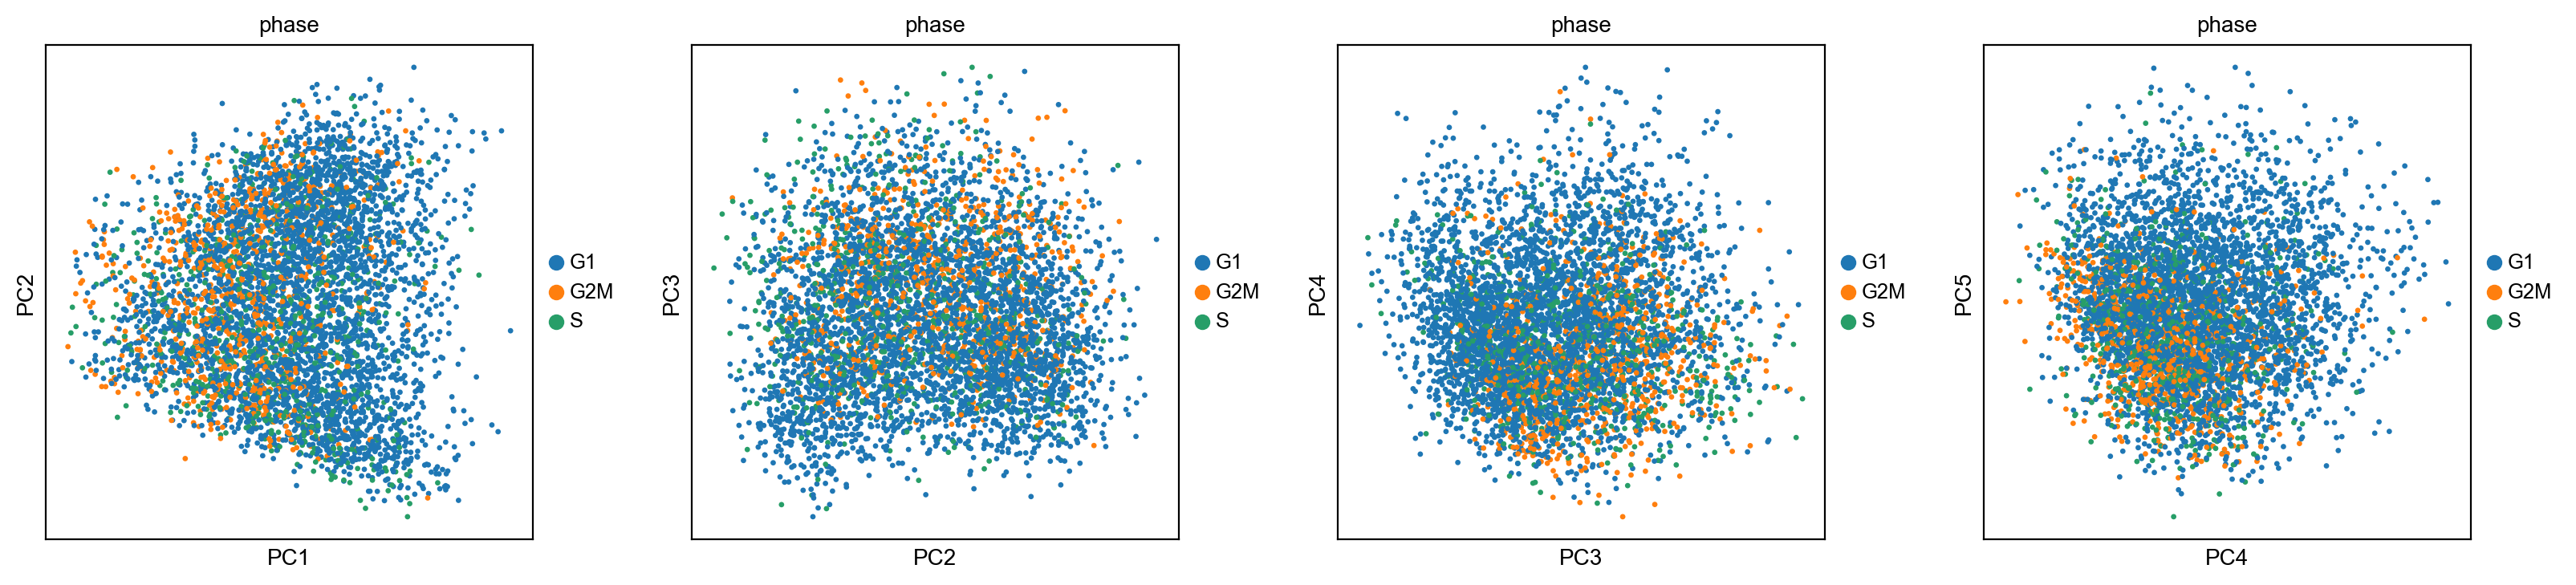

In [16]:
sc.pl.pca(adata,color=['phase'],dimensions =  [(0, 1), (1, 2), (2,3), (3,4)])

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


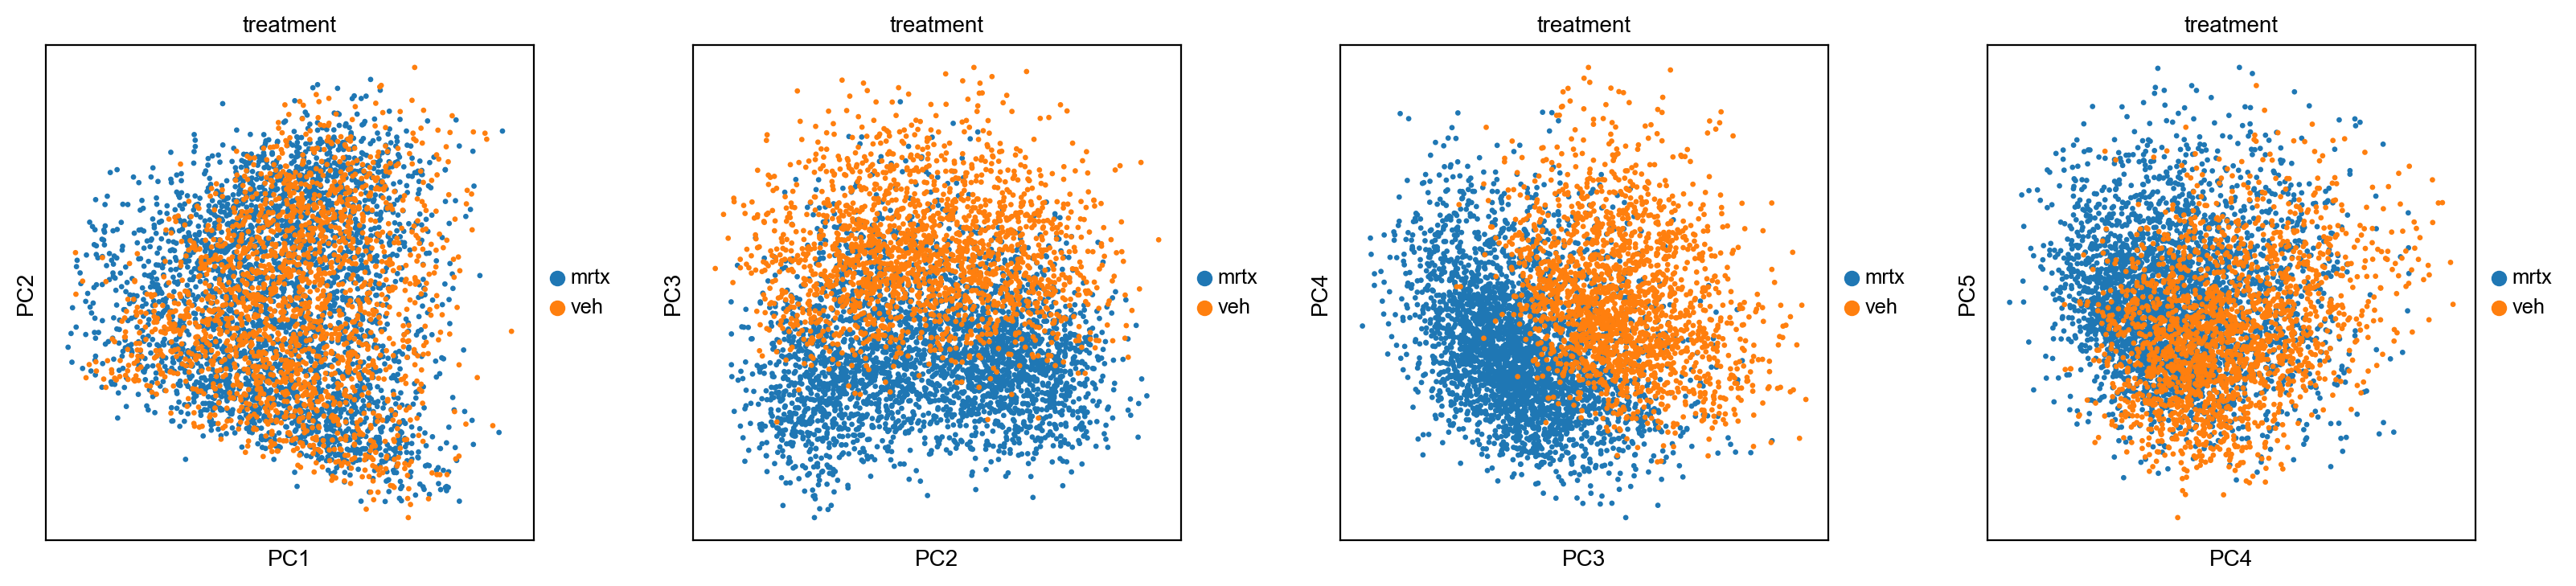

In [224]:
sc.pl.pca(adata,color=['treatment'],dimensions =  [(0, 1), (1, 2), (2,3), (3,4)])

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


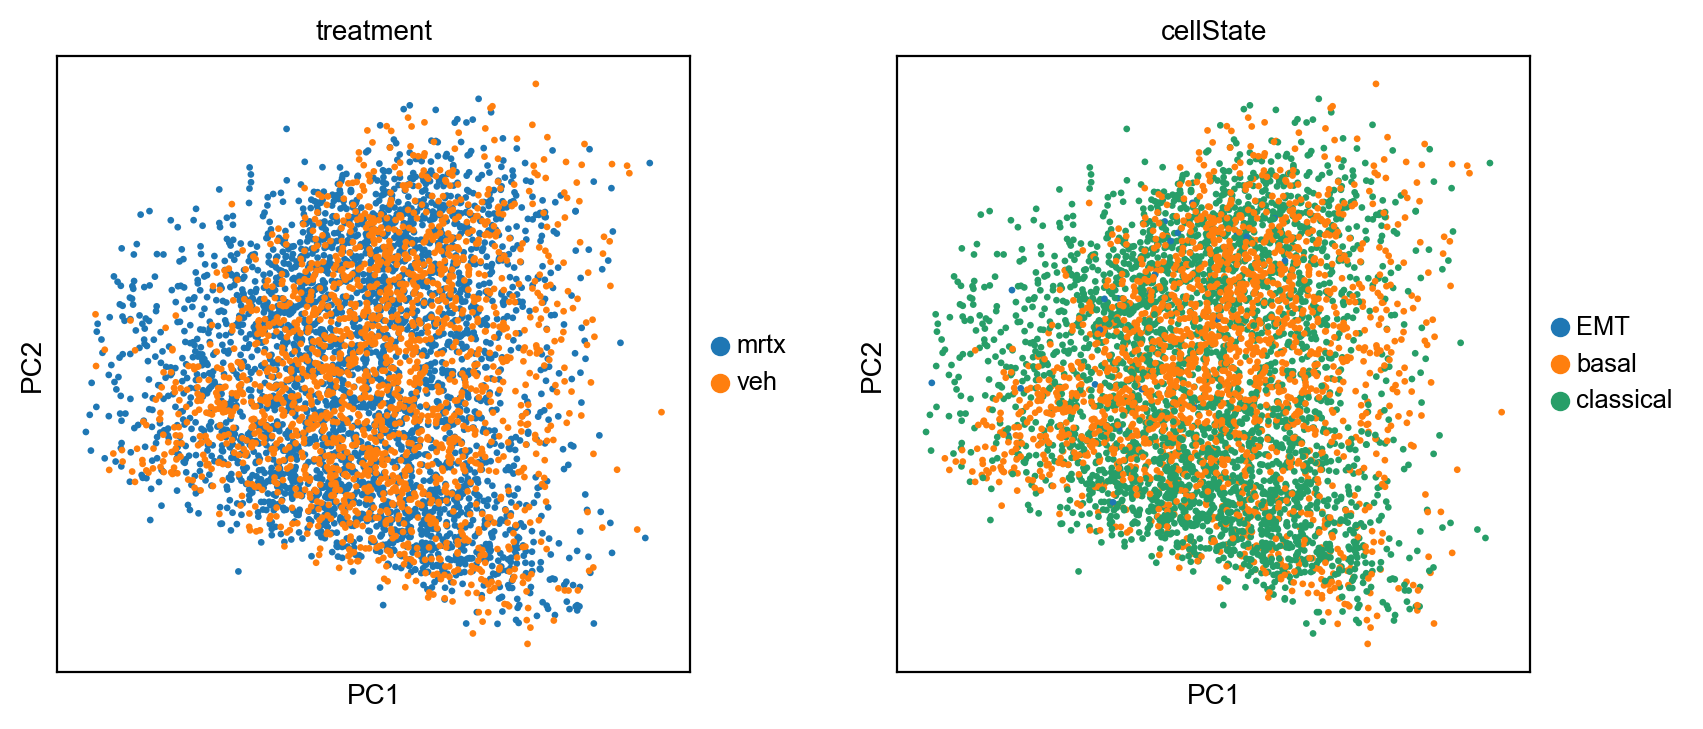

In [225]:
sc.pl.pca(adata,color=['treatment', 'cellState'])

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


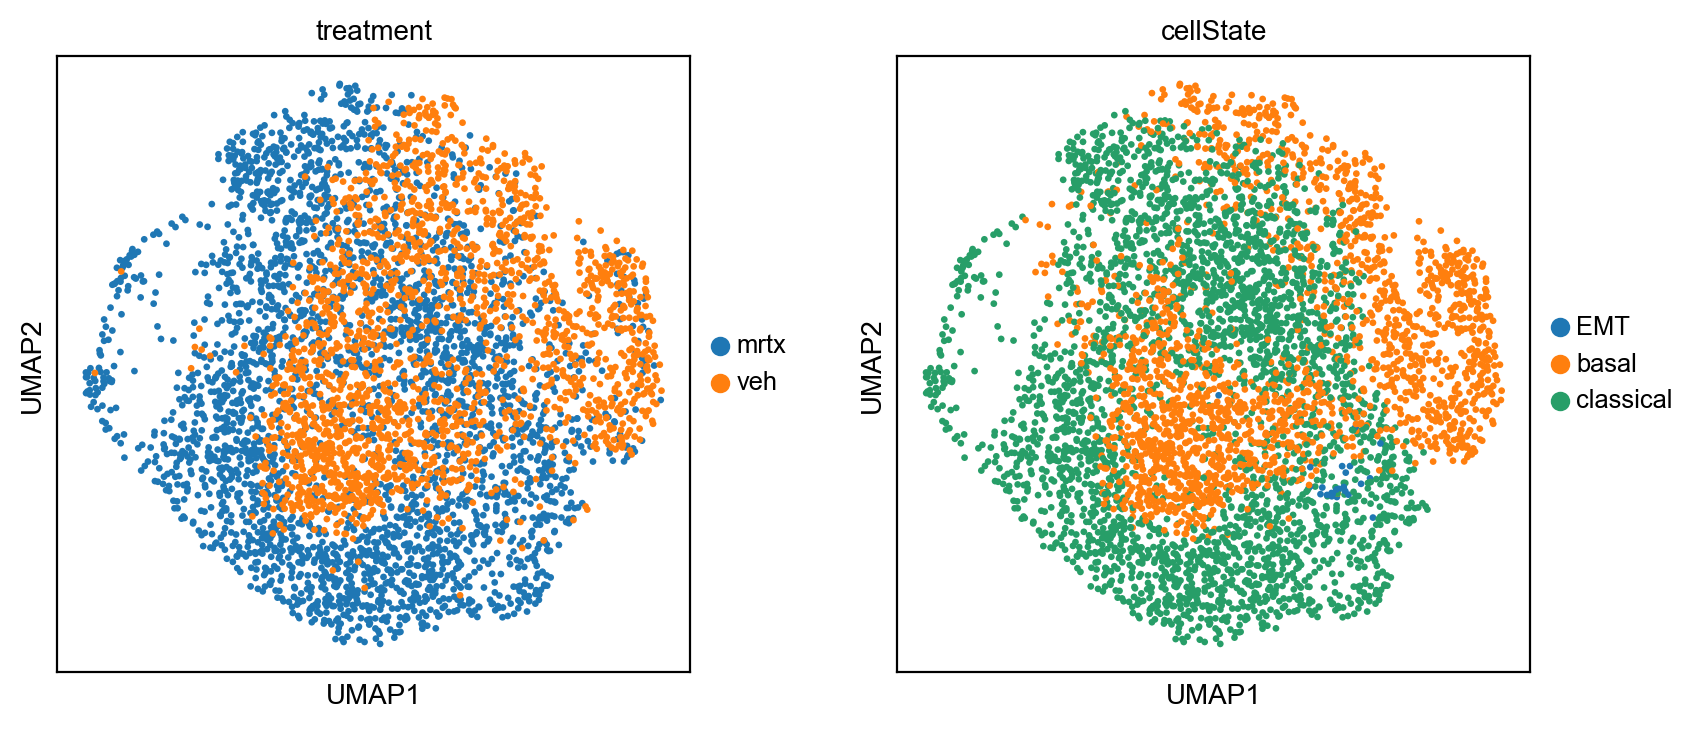

In [226]:
sc.pl.umap(adata,color=['treatment', 'cellState'])

In [227]:
adata.varm["PCs"][:,0]

array([0.00349359, 0.00440813, 0.00504016, ..., 0.00302382, 0.08009084,
       0.00230245])

(array([   9.,   24.,  196., 1329.,  314.,  137.,   52.,   23.,    7.,
           7.]),
 array([-0.05251124, -0.03517958, -0.01784792, -0.00051626,  0.0168154 ,
         0.03414706,  0.05147872,  0.06881038,  0.08614203,  0.10347369,
         0.12080535]),
 <BarContainer object of 10 artists>)

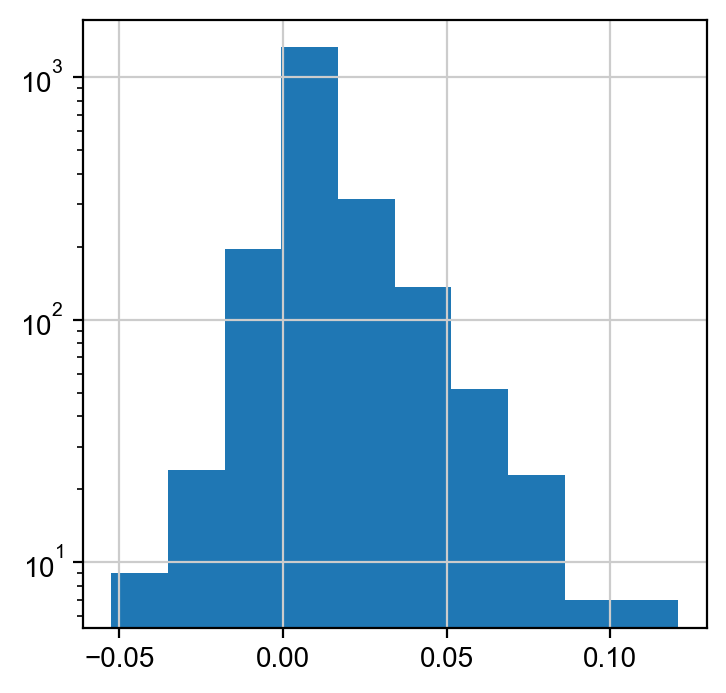

In [228]:
plt.hist(adata.varm["PCs"][:,0], log=True)

In [229]:
argsorted = np.argsort(adata.varm["PCs"][:,2])
argsorted

array([1100, 1982, 1693, ...,  611, 2034,  188])

In [230]:
adata.varm["PCs"][:,2]

array([ 0.0020942 , -0.00773985, -0.00770169, ..., -0.00041355,
        0.01463371,  0.00273015])

In [231]:
adata.var_names[argsorted[-10:]]

Index(['VCAN', 'BICC1', 'CREB5', 'LSAMP', 'WWTR1', 'FRMD5', 'GRB10', 'DCBLD2',
       'VIM', 'AKAP12'],
      dtype='object')

In [232]:
adata.var_names[argsorted[:10]].values.tolist()

['LCN2',
 'TSPAN8',
 'SEMA6A',
 'TMC5',
 'TM4SF4',
 'SLPI',
 'CFTR',
 'PROM1',
 'C15orf48',
 'TXNIP']

In [233]:
adata.obsm["X_pca"][:,0]

array([ 0.2439785,  7.1877985, -3.1078463, ..., -1.060564 ,  3.7253275,
       -3.2999125], dtype=float32)

In [234]:
res = stats.pearsonr(adata.obs["scBasalScore"], adata.obsm["X_pca"][:,0])
res

(-0.0694792737050743, 6.865255333984157e-07)

In [235]:
from sklearn.metrics.pairwise import cosine_similarity
lenPCs = 20
cosSimDif = np.zeros(lenPCs)
perCorrDif = np.zeros(lenPCs)

allCosB = np.zeros(lenPCs)
allCosC = np.zeros(lenPCs)

allCorrB = np.zeros(lenPCs)
allCorrC = np.zeros(lenPCs)


for i in range(lenPCs):
    #print(f"PC {i+1}")
    cosB = cosine_similarity(adata.obs["scBasalScore"].values.reshape(1, -1), adata.obsm["X_pca"][:,i].reshape(1, -1))[0][0]
    cosC = cosine_similarity(adata.obs["scClassicalScore"].values.reshape(1, -1), adata.obsm["X_pca"][:,i].reshape(1, -1))[0][0]
    corrB, pval = stats.pearsonr(adata.obs["scBasalScore"].values, adata.obsm["X_pca"][:,i])
    corrC, pval = stats.pearsonr(adata.obs["scClassicalScore"].values, adata.obsm["X_pca"][:,i])
    
    allCosB[i] = cosB
    allCosC[i] = cosC

    allCorrB[i] = corrB
    allCorrC[i] = corrC
    
    cosSimDif[i] = np.abs(cosB - cosC)
    perCorrDif[i] = np.abs(corrB - corrC)

In [236]:
print(np.round(allCosB, decimals=2))
print(np.round(allCosC, decimals=2))

print(np.round(allCorrB, decimals=2))
print(np.round(allCorrC, decimals=2))

[-0.02  0.03  0.18 -0.04  0.09 -0.11  0.05 -0.04 -0.04  0.01  0.    0.01
  0.    0.05 -0.03  0.01  0.01 -0.04  0.02 -0.01]
[-0.01  0.04 -0.21  0.03  0.02 -0.14  0.06  0.01 -0.04  0.01  0.03 -0.01
 -0.01  0.05 -0.02 -0.03  0.01  0.    0.02  0.  ]
[-0.07  0.11  0.6  -0.15  0.31 -0.36  0.17 -0.13 -0.15  0.05  0.    0.03
  0.    0.18 -0.11  0.04  0.05 -0.14  0.07 -0.05]
[-0.04  0.13 -0.7   0.11  0.07 -0.47  0.21  0.02 -0.12  0.02  0.09 -0.02
 -0.04  0.17 -0.05 -0.09  0.03  0.01  0.06  0.01]


In [237]:
np.round(cosSimDif, decimals=2)

array([0.01, 0.01, 0.39, 0.08, 0.07, 0.04, 0.02, 0.05, 0.01, 0.01, 0.03,
       0.01, 0.01, 0.  , 0.02, 0.04, 0.  , 0.04, 0.  , 0.02])

In [238]:
np.round(perCorrDif, decimals=2)

array([0.03, 0.02, 1.3 , 0.26, 0.24, 0.11, 0.05, 0.16, 0.03, 0.02, 0.09,
       0.05, 0.04, 0.01, 0.06, 0.13, 0.01, 0.15, 0.01, 0.06])

In [239]:
print(np.argsort(cosSimDif)[::-1]+1)
print(np.argsort(perCorrDif)[::-1]+1)

[ 3  4  5  8 18 16  6 11 20 15  7 12 13  9  1  2 10 17 19 14]
[ 3  4  5  8 18 16  6 11 20 15  7 12 13  9  1  2 10 17 14 19]


/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


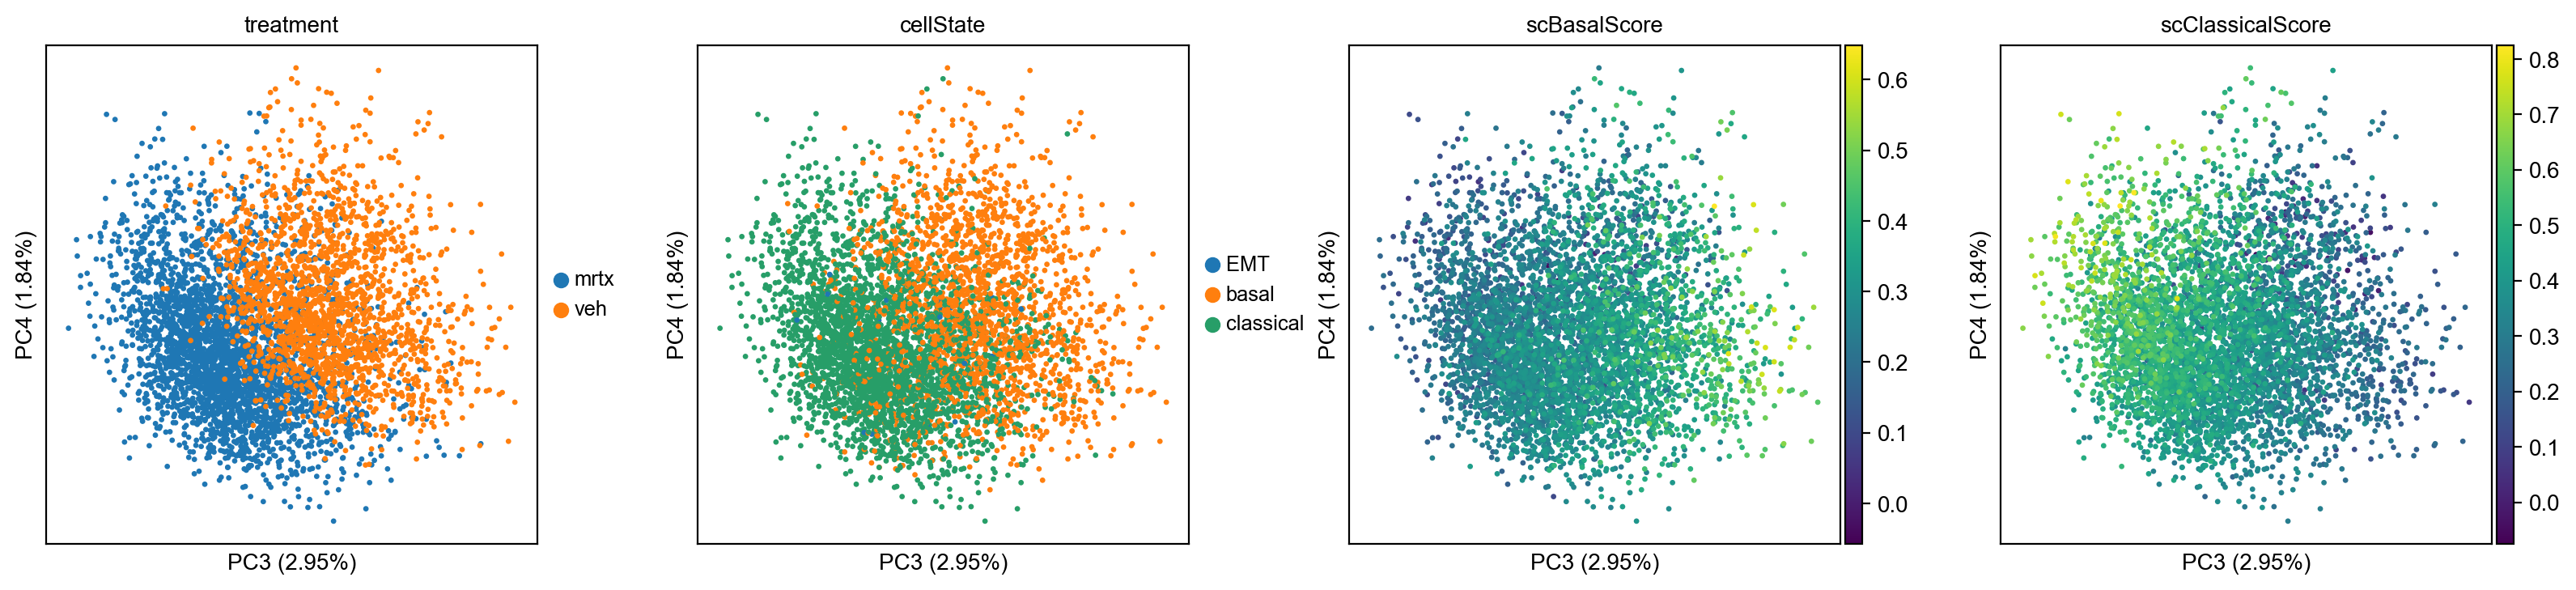

In [240]:
sc.pl.pca(adata, color=["treatment","cellState","scBasalScore","scClassicalScore"], dimensions=np.argsort(cosSimDif)[::-1][:2], annotate_var_explained=True)

In [72]:
np.intersect1d(sigGenes["scBasal"].values,adata.var_names[argsorted[-200:]])

array(['AKAP12', 'ANXA1', 'BCAR3', 'CALD1', 'CAPRIN2', 'CAV1', 'CHST11',
       'CST6', 'DCBLD2', 'DDIT4', 'EMP1', 'F3', 'FRMD6', 'HMGA2', 'KRT7',
       'LAMA3', 'LAMB3', 'LAMC2', 'MTRNR2L8', 'MYOF', 'P4HA1', 'PALLD',
       'PLAU', 'PRSS23', 'RAI14', 'RASAL2', 'S100A2', 'SEMA3A', 'SEMA3C',
       'SERPINE1', 'SLC2A1', 'SPIRE1', 'TGFBI', 'THBS1', 'VIM'],
      dtype=object)

In [75]:
np.intersect1d(sigGenes["scClassical"].values,adata.var_names[argsorted[:200]])

array(['AGMO', 'AGR3', 'ATP10B', 'BACE2', 'BCAS1', 'CALML4', 'CASR',
       'CEACAM5', 'CEACAM6', 'CXCL5', 'CYP3A5', 'FER1L6', 'IQGAP2',
       'KALRN', 'LIPH', 'MUC13', 'MUC5AC', 'MYO7B', 'ONECUT2', 'PDZK1IP1',
       'PHGR1', 'PLAC8', 'POF1B', 'REG4', 'S100P', 'SLC40A1',
       'ST6GALNAC1', 'SYTL2', 'TFF2', 'TFF3', 'TM4SF4', 'TMC5', 'TSPAN1',
       'TSPAN8'], dtype=object)

In [85]:
for i in range(20):
    print(f"PC {i+1}")
    asortPCLoad = np.argsort(adata.varm["PCs"][:,i])
    topGenes = adata.var_names[asortPCLoad[-100:]]
    botGenes = adata.var_names[asortPCLoad[:100]]
    basalGenes = sigGenes["scBasal"].values
    classGenes = sigGenes["scClassical"].values
    print(f"basal overlap top {len(np.intersect1d(basalGenes,topGenes))}")
    print(f"class overlap top {len(np.intersect1d(classGenes,topGenes))}")
    print(f"basal overlap bot {len(np.intersect1d(basalGenes,botGenes))}")
    print(f"class overlap bot {len( np.intersect1d(classGenes,botGenes))}")


PC 1
basal overlap top 4
class overlap top 1
basal overlap bot 9
class overlap bot 9
PC 2
basal overlap top 2
class overlap top 3
basal overlap bot 8
class overlap bot 0
PC 3
basal overlap top 23
class overlap top 0
basal overlap bot 1
class overlap bot 21
PC 4
basal overlap top 6
class overlap top 20
basal overlap bot 10
class overlap bot 5
PC 5
basal overlap top 13
class overlap top 12
basal overlap bot 2
class overlap bot 5
PC 6
basal overlap top 3
class overlap top 0
basal overlap bot 10
class overlap bot 15
PC 7
basal overlap top 9
class overlap top 17
basal overlap bot 1
class overlap bot 7
PC 8
basal overlap top 4
class overlap top 10
basal overlap bot 7
class overlap bot 6
PC 9
basal overlap top 4
class overlap top 8
basal overlap bot 6
class overlap bot 6
PC 10
basal overlap top 9
class overlap top 6
basal overlap bot 6
class overlap bot 4
PC 11
basal overlap top 5
class overlap top 9
basal overlap bot 13
class overlap bot 3
PC 12
basal overlap top 3
class overlap top 1
basal 

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


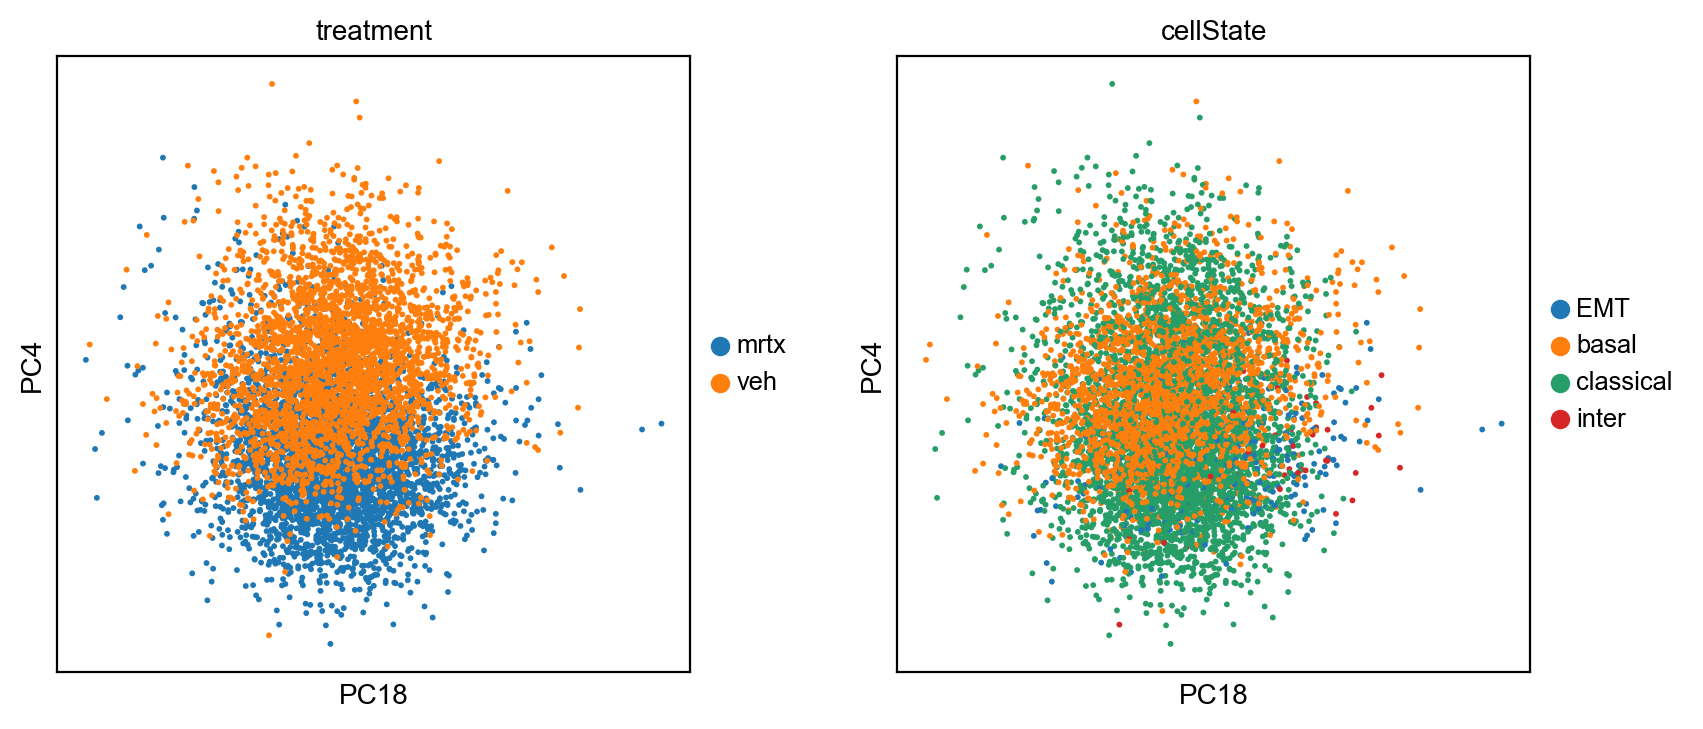

In [201]:
sc.pl.pca(adata, color=["treatment","cellState"], dimensions=[(17,3)])

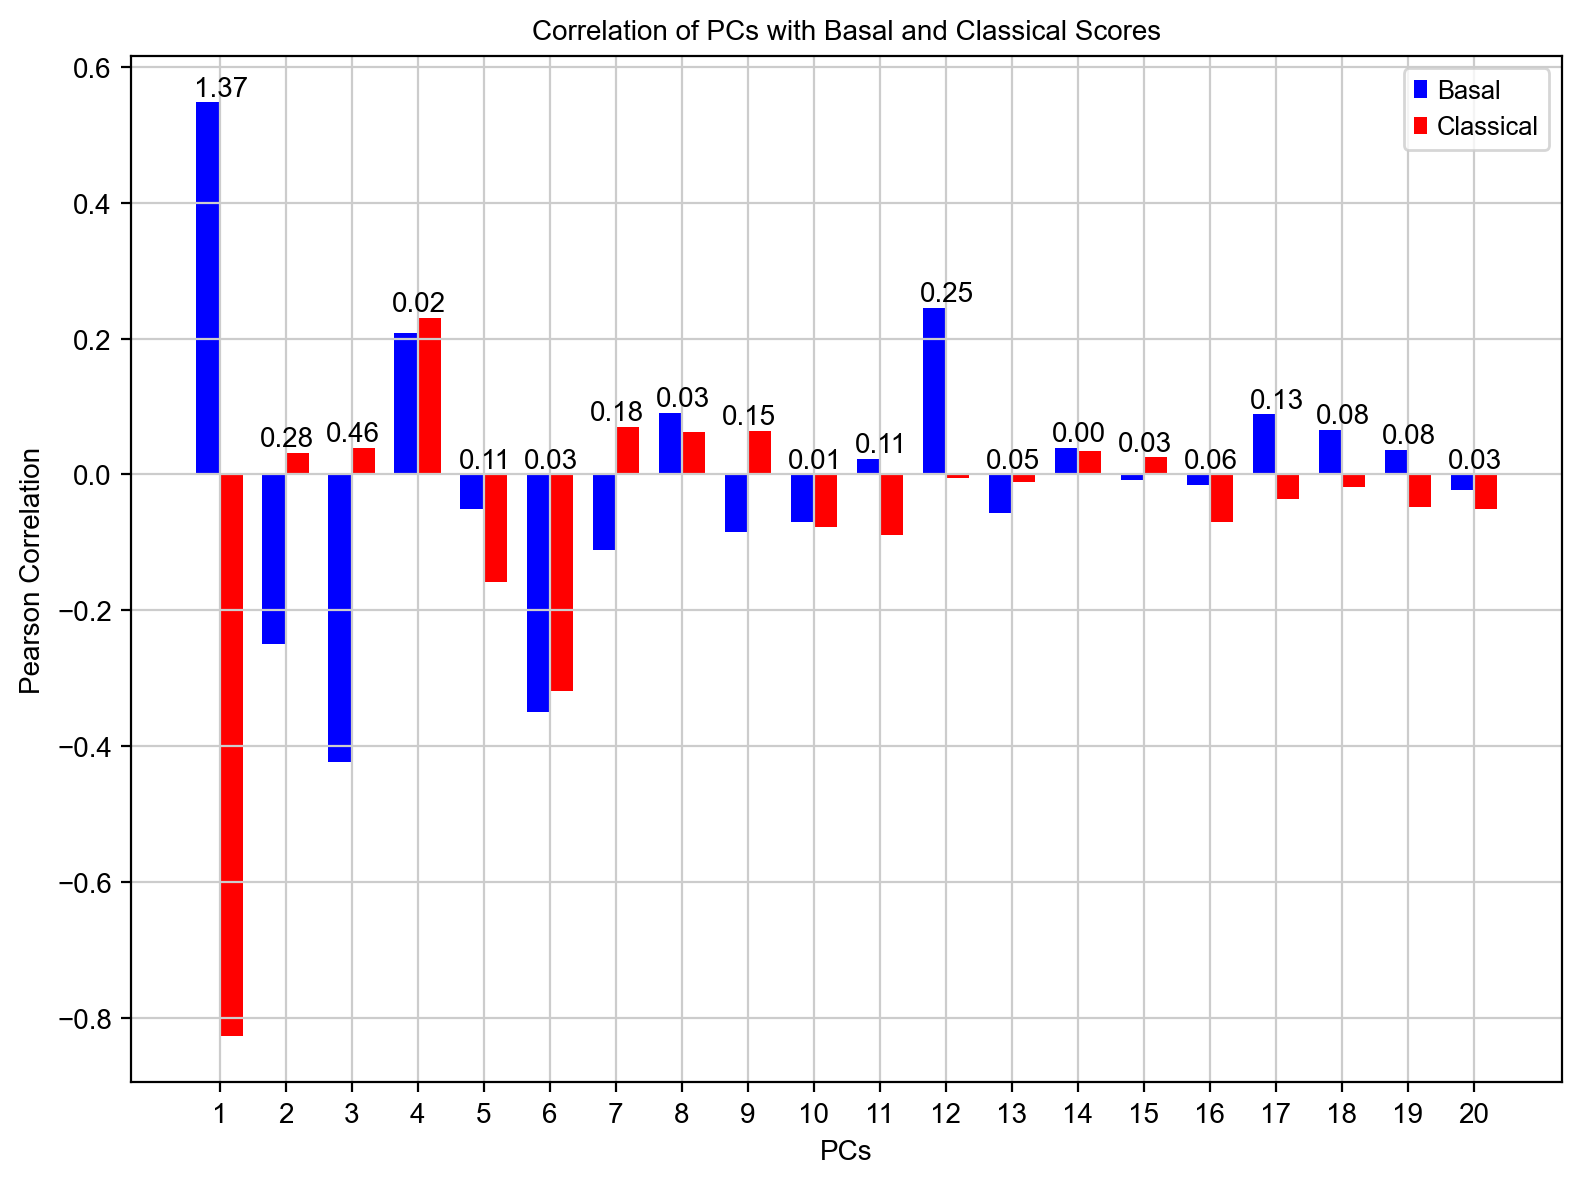

In [209]:
#made with the help of chatGPT

numPCs = len(allCorrB)
# Find the index of the student with the largest difference
differences = np.abs(allCorrB - allCorrC)
max_diff_index = np.argmax(differences)

# Plotting
plt.figure(figsize=(8, 6))
bar_width = 0.35

index = np.arange(1, numPCs+1)
bars1 = plt.bar(index - bar_width/2, allCorrB, bar_width, color='b', label='Basal')

# Plot Grade 2
bars2 =plt.bar(index + bar_width/2, allCorrC, bar_width, color='r', label='Classical')

for i in range(len(index)):
    plt.text((index[i] - bar_width/2)+0.2, max(0,max(allCorrB[i], allCorrC[i])) + 0.01, f'{differences[i]:.2f}', ha='center')

# Highlight the student with the largest difference
#plt.plot([max_diff_index + 1 - bar_width/2, max_diff_index + 1 + bar_width/2],[allCorrB[max_diff_index], allCorrC[max_diff_index]], 'g--')  

#bars1[max_diff_index].set_edgecolor('yellow')
#bars1[max_diff_index].set_linewidth(2)
#bars2[max_diff_index].set_edgecolor('yellow')
#bars2[max_diff_index].set_linewidth(2)

#plt.plot(np.arange(1, numPCs+1), allCorrB, 'bo', label='Basal', markersize=10)  # Plot Grade 1
#plt.plot(np.arange(1, numPCs+1), allCorrC, 'ro', label='Classical', markersize=10)  # Plot Grade 2
#plt.plot([max_diff_index + 1] * 2, [allCorrB[max_diff_index], allCorrC[max_diff_index]], 'g--')  # Connect the grades for the student with the largest difference

# Customizing plot
plt.title('Correlation of PCs with Basal and Classical Scores')
plt.xlabel('PCs')
plt.ylabel('Pearson Correlation')
plt.xticks(np.arange(1, numPCs+1))  # Set ticks for each student
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
adata

AnnData object with n_obs × n_vars = 5097 × 2098
    obs: 'MRTX1_B0251', 'MRTX2_B0252', 'MRTX3_B0253', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'GMM', 'Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256', 'treatment', 'S_score', 'G2M_score', 'phase', 'leiden', 'tumor', 'scBasalScore', 'scClassicalScore', 'EMTScore', 'cellState', 'decoupler', 'zsig'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mt'
    uns: 'GMM_colors', 'cellState_colors', 'decoupler_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase

In [85]:
from sklearn.metrics.pairwise import cosine_similarity
lenPCs = 20

label1 = "mrtxScore"#'scBasalScore'#"S_score"
label2 = "vehScore"#'scClassicalScore'#"G2M_score"

#find pcs pearson correlated with given score
def findDiffPCs(adata, label1, label2=None, lenPCs=20, show=True):
    #intitalize to 0
    #cosSimDif = np.zeros(lenPCs)
    perCorrDif = np.zeros(lenPCs)

    #allCosB = np.zeros(lenPCs)
    #allCosC = np.zeros(lenPCs)

    allCorrB = np.zeros(lenPCs)
    allCorrC = np.zeros(lenPCs)
    
    #if pca hasnt been calcualted calulcate it 
    if("X_pca" not in adata.obsm): 
        sc.tl.pca(adata)
    
    #if given a categorical variable split it into two numbered scores
    if(label2==None):    #if(adata.obs[label1].dtype != float or adata.obs[label1].dtype != int or adata.obs[label2].dtype != float or adata.obs[label2].dtype != int):
        cat1 = adata.obs[label1].cat.categories[0]
        cat2 = adata.obs[label1].cat.categories[1]

        adata.obs[f"{cat1}Score"] = [1 if m==cat1 else 0 for m in adata.obs[label1]]
        adata.obs[f"{cat2}Score"] = [1 if m==cat2 else 0 for m in adata.obs[label1]]
        
        label1 = f"{cat1}Score"
        label2 = f"{cat2}Score"
    
    for i in range(lenPCs):
        #print(f"PC {i+1}")
        #cosB = cosine_similarity(adata.obs[f"{label1}"].values.reshape(1, -1), adata.obsm["X_pca"][:,i].reshape(1, -1))[0][0]
        #cosC = cosine_similarity(adata.obs[f"{label2}"].values.reshape(1, -1), adata.obsm["X_pca"][:,i].reshape(1, -1))[0][0]
        corrB, pval = stats.pearsonr(adata.obs[f"{label1}"].values, adata.obsm["X_pca"][:,i])
        corrC, pval = stats.pearsonr(adata.obs[f"{label2}"].values, adata.obsm["X_pca"][:,i])

        #allCosB[i] = cosB
        #allCosC[i] = cosC

        allCorrB[i] = corrB
        allCorrC[i] = corrC

        #cosSimDif[i] = np.abs(cosB - cosC)
        perCorrDif[i] = np.abs(corrB - corrC)

    #made with the help of chatGPT

    numPCs = len(allCorrB)
    differences = np.abs(allCorrB - allCorrC)
    indSort = np.argsort(differences)

    if(show):
        # Plotting
        plt.figure(figsize=(8, 6))
        bar_width = 0.35

        index = np.arange(1, numPCs+1)
        bars1 = plt.bar(index - bar_width/2, allCorrB, bar_width, color='b', label=label1)

        # Plot Grade 2
        bars2 =plt.bar(index + bar_width/2, allCorrC, bar_width, color='r', label=label2)

        for i in range(len(index)):
            plt.text((index[i] - bar_width/2)+0.2, max(0,max(allCorrB[i], allCorrC[i])) + 0.01, f'{differences[i]:.2f}', ha='center')

        # Highlight the student with the largest difference
        #plt.plot([max_diff_index + 1 - bar_width/2, max_diff_index + 1 + bar_width/2],[allCorrB[max_diff_index], allCorrC[max_diff_index]], 'g--')  

        #bars1[max_diff_index].set_edgecolor('yellow')
        #bars1[max_diff_index].set_linewidth(2)
        #bars2[max_diff_index].set_edgecolor('yellow')
        #bars2[max_diff_index].set_linewidth(2)

        #plt.plot(np.arange(1, numPCs+1), allCorrB, 'bo', label='Basal', markersize=10)  # Plot Grade 1
        #plt.plot(np.arange(1, numPCs+1), allCorrC, 'ro', label='Classical', markersize=10)  # Plot Grade 2
        #plt.plot([max_diff_index + 1] * 2, [allCorrB[max_diff_index], allCorrC[max_diff_index]], 'g--')  # Connect the grades for the student with the largest difference

        # Customizing plot
        plt.title(f'Correlation of PCs with {label1} and {label2}')
        plt.xlabel('PCs')
        plt.ylabel('Pearson Correlation')
        plt.xticks(np.arange(1, numPCs+1))  # Set ticks for each student
        plt.legend()

        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    return indSort[::-1]

/Users/jonathanrub/miniforge3/envs/scDL/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


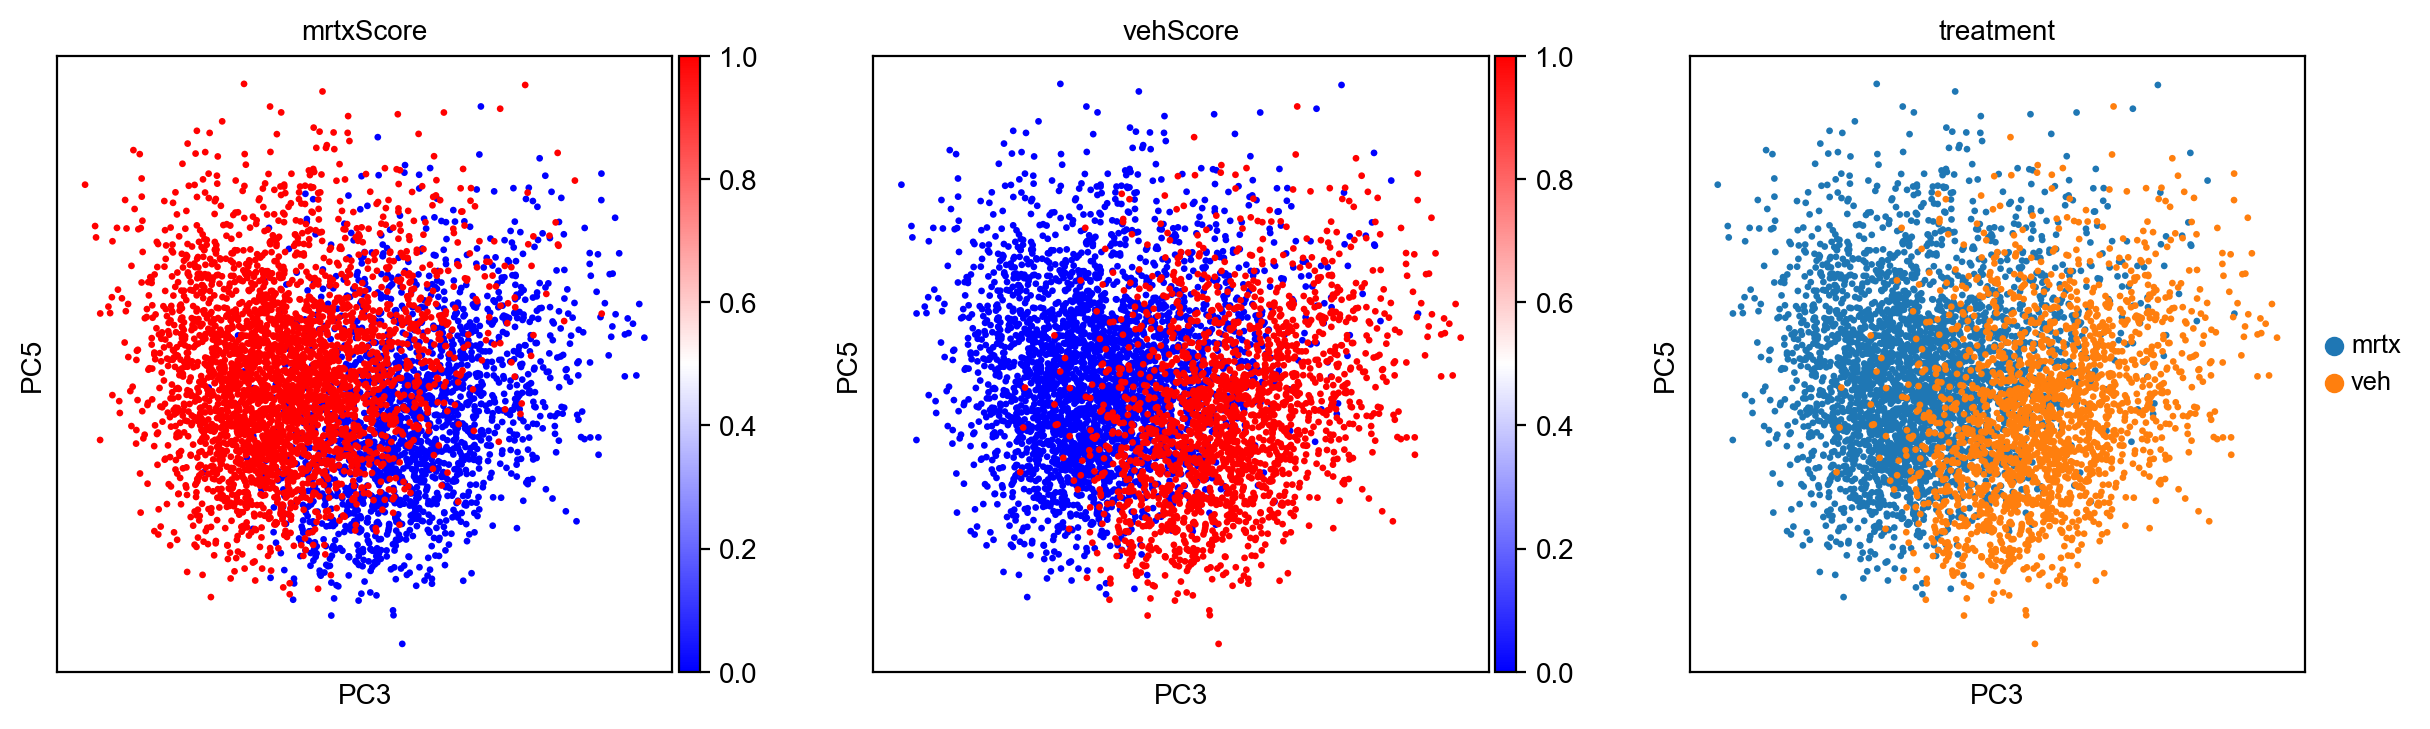

In [49]:
sc.pl.pca(adata, color=[label1,label2,"treatment"], dimensions=[(2,4)], cmap="bwr")

In [47]:
adata.obs["mrtxScore"] = [1 if m=="mrtx" else 0 for m in adata.obs.treatment]
adata.obs["vehScore"] =[1 if m=="veh" else 0 for m in adata.obs.treatment]

In [75]:
cat1, cat2 = adata.obs.treatment.cat.categories
cat1, cat2 

('mrtx', 'veh')

In [64]:
adata.obs.scBasalScore.dtype == "float64"

True

In [66]:
adata.obs.scBasalScore.dtype == float

True

In [70]:
"X_pca" not in adata.obsm.keys()
 

False

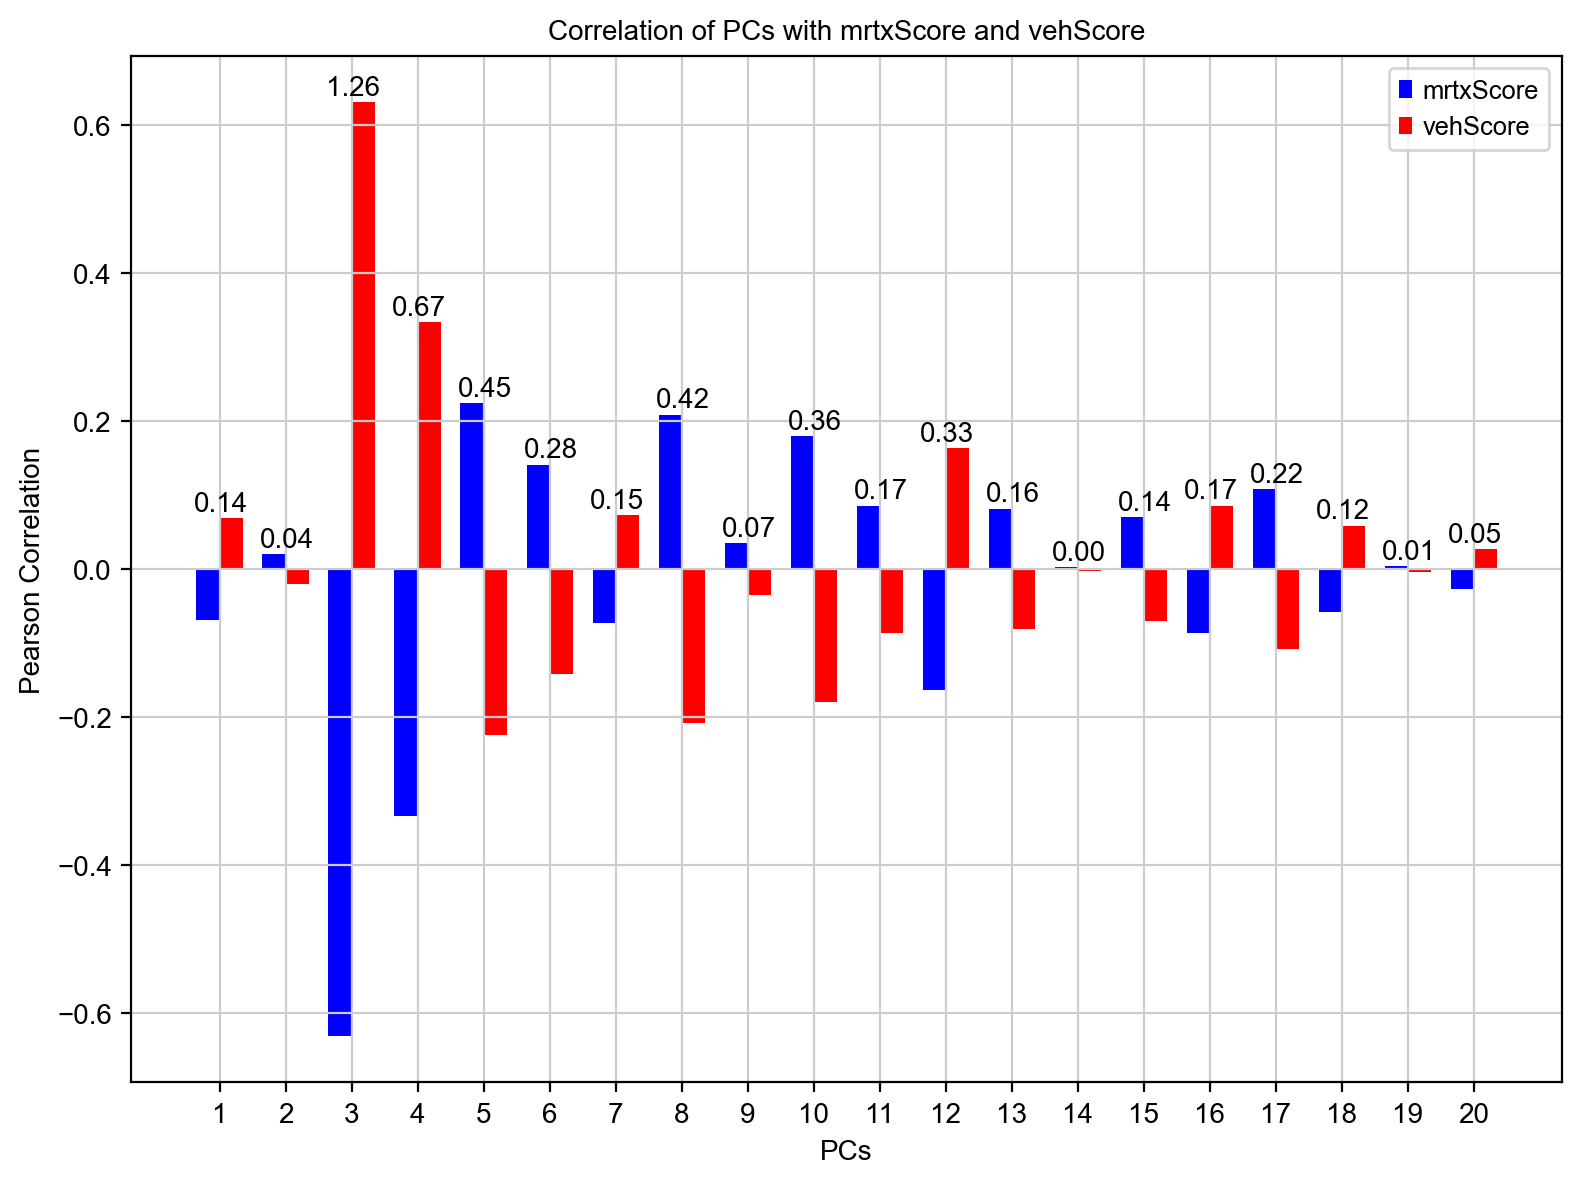

array([ 2,  3,  4,  7,  9, 11,  5, 16, 15, 10, 12,  6, 14,  0, 17,  8, 19,
        1, 18, 13])

In [86]:
findDiffPCs(adata, "treatment", label2=None, lenPCs=20, show=True)

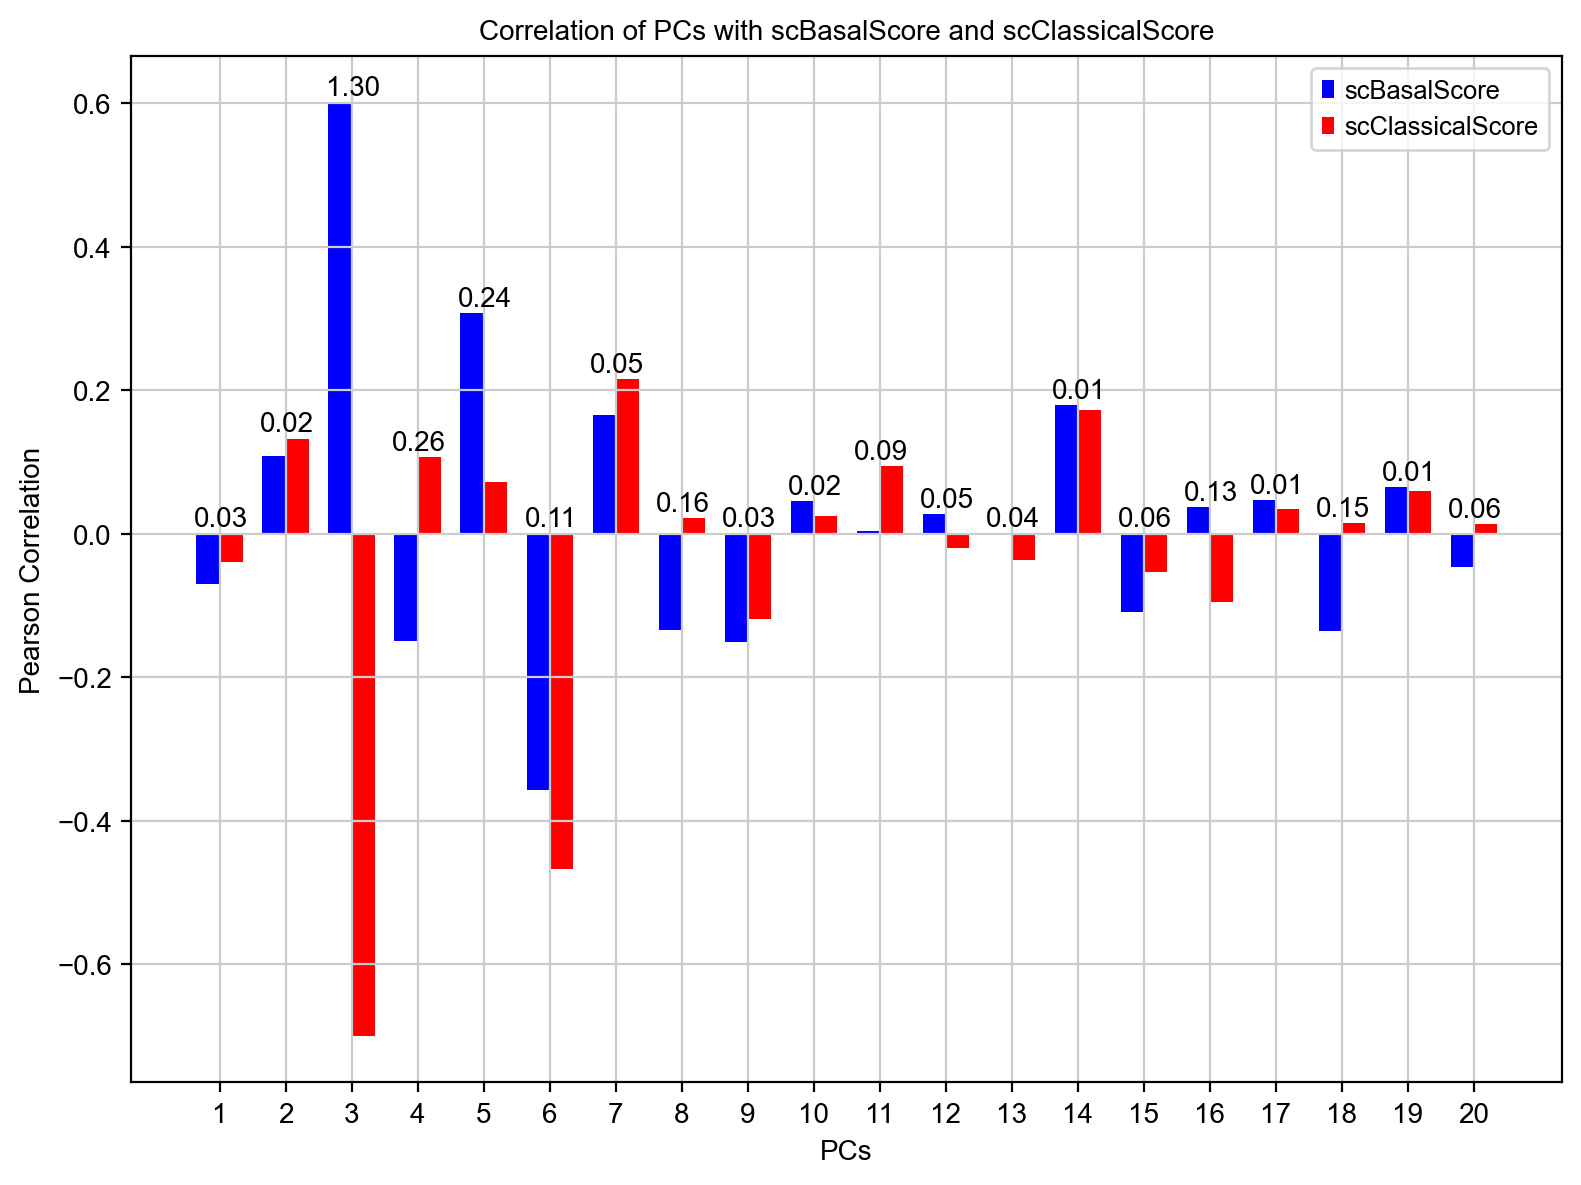

array([ 2,  3,  4,  7, 17, 15,  5, 10, 19, 14,  6, 11, 12,  8,  0,  1,  9,
       16, 13, 18])

In [87]:
findDiffPCs(adata, "scBasalScore", label2="scClassicalScore", lenPCs=20, show=True)